# DS Pract11: Cross-validation: Regression and Classification

## Instructions for Completion of THIS Practical

1. **Submission:**
    - Complete and Upload this Jupyter Notebook:   
        - Keep the filename same as this notebook filename after filling up roll no etc   

## Enter your information
**Imp: Run the code cell below, after entering your information as explained there**

In [2]:
                                                                                                                                                                                                                                                                                                                                                                    # VVIMP: Fill up & Run this code cell first before starting with later cells
# ---------------------------------------
# Start of: Write your information here
# ---------------------------------------
# Enter your roll number, gr no & name below
# Do not change variable names
rn <- 43 # DO NOT enter roll no with a negative sign
grn <- 11910702 # DO NOT enter gr no with a negative sign
my_name <- "Tushar Chavan"
# ---------------------------------------
# End of: Write your information here
# ---------------------------------------
sprintf("My Roll Number is: %s", rn)
sprintf("My GR Number is  : %s", grn)
sprintf("Name is  : %s", my_name)

[1] "My Roll Number is: 43"

[1] "My GR Number is  : 11910702"

[1] "Name is  : Tushar Chavan"

## Cross-validation: Polynomial Linear Regression

### Instructions

We will be doing Polynomial Linear Regression on the mpg dataset from tidyverse.   
- Input: displ (ie engine displacement)
- Output: cty (city mileage in mpg)

**Todo:**   
Change the code in the next cell as follows (at places where you
see question marks "???"):  
1. In the for loop, PLR fit is being made using the command glm
    - Enter the following formula in the command in 
        place of "???Formula???"   
        ```cty ~ poly(displ,ideg)```
    - Enter ```mpg``` for data
    
    
2. Fill up the main "cv.glm" command as follows:   
    - ```cv.glm(<dataset>,<glm fit object>,K=???)```
      In above: 
      + dataset is ```mpg```
      + glm fit obect is ```glm.fit``` created earlier
      + K is the value of k-fold cv you want. Use ```10```

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.4     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



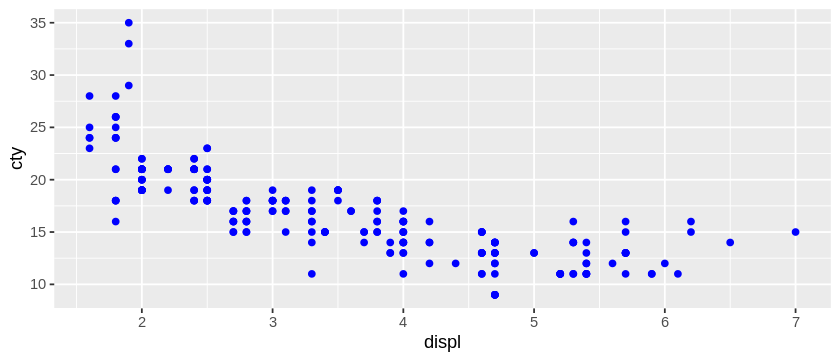

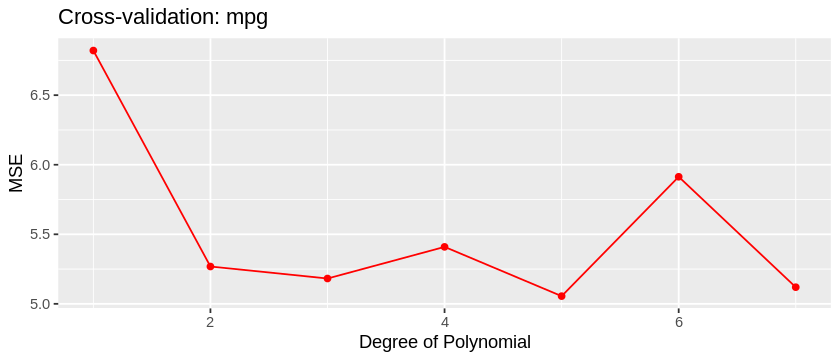

In [ ]:
library(boot)
library(tidyverse); library(repr); options(repr.plot.height=3)
set.seed(grn)

# --------- Plot of cty mileage vs displ ---------
ggplot(mpg) + geom_point(aes(displ,cty),color='blue')

# ------------ Looping over polynomial degree (1 to ndeg)
MSE_loocv  <- c()
MSE_kfold  <- c()
deg_i  <- c()
ndeg  <- 7
for (ideg in 1:ndeg) { 
    # ----- Polynomial Linear Regression on mgp ----
    # (cty vs displ)
    glm.fit  <- glm(cty ~ poly(displ,ideg), data = mpg)
    
    # ----------- LOOCV -----------
    # cv.err.loocv  <- cv.glm(mpg,glm.fit) # LOOCV (K not given)
    # MSE_loocv  <- c(MSE_loocv,cv.err.loocv$delta[1])
    
    # ----------- K-fold Cross-validation -----------
    cv.err.kfold  <- cv.glm(mpg,glm.fit,K=10)
    MSE_kfold  <- c(MSE_kfold,cv.err.kfold$delta[1])
    deg_i  <- c(deg_i,ideg)
}

# ----------- Plot: MSE Vs Degree of Polynomial -----------
plt  <- ggplot() 
# plt  <- plt + geom_line(aes(deg_i,MSE_loocv),color="blue") 
# plt  <- plt + geom_point(aes(deg_i,MSE_loocv),color="blue") 
plt  <- plt + geom_line(aes(deg_i,MSE_kfold),color="red") 
plt  <- plt + geom_point(aes(deg_i,MSE_kfold),color="red") 
plt  <- plt  +labs(title="Cross-validation: mpg",
                   x="Degree of Polynomial",y="MSE")
plt

### Answer following questions

Please answer 'inline', ie just below each question
1. What is the optimal value of polynomial degree? Is the best fit linear?
3. How much is the corresponding MSE?

Answer:
1. 5 , It is the best Linear Fit.
3. Nearly 5

### Optional Exercises

- The code for LOOCV has been commented out. Uncomment it and check how 10-fold CV compares with LOOCV
- Plot the following curves on the same scatter plot of cty Vs displ above: 
    1. best fit regression curve 
    2. linear (degree 1) fit curve 
    3. Highest degree polynomial fit curve (ndeg)
    
- Repeat for Highway mileage (hwy) instead of cty
- Use any other dataset in place of mpg and carry out regression with cross-validation

## Cross-validation: knn on Iris with LOOCV

### Instructions

We will be doing knn classification on the iris dataset  


**Todo**  
Change the code in the next cell as follows (at places where you
see question marks "???"):  
1. Use proper dataframes names in the knn command 
    - train = ? (Use iris database without the 5th column)
    - cl = ? (Use iris 5th column)
    
    Note: cl has the 'Species' values for training

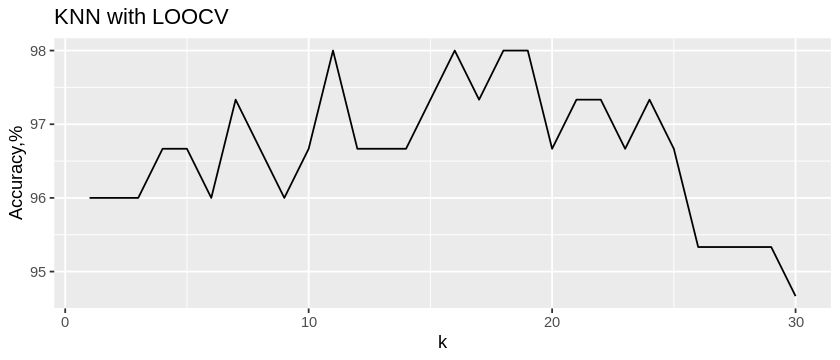

In [3]:
library(class)
library(tidyverse)
x <- as.matrix(iris[, 1:4])
y <- iris[, 5]
set.seed(grn)
accu  <- c()
kmax  <- 30
for (k in 1:kmax){
    iris_pred_test  <-  knn.cv( train = x, 
                     cl = y,k=k,prob=TRUE)
    ac  <- (1 -   mean(iris_pred_test != iris$Species))*100
    accu  <- c(accu,ac)
}   

library(tidyverse)
library(repr); options(repr.plot.height=3)
ggplot() + geom_line(aes(x=1:kmax,y=accu)) +
labs(x="k",y="Accuracy,%",title="KNN with LOOCV")

### Answer the following questions

- How many categories (levels) of the iris Species are there? Which?  
  Ans: Three : setosa versicolor virginica
- What is the best k value for the knn classification here? 
  Ans: 11
- For this best k value, how many of the 150 iris flowers are incorrectly classified?  
  Ans: 3

### Optional Exercises

- Try out with the full range of possible k values and report the outcome here
- Use any other dataset in place of iris and carry out knn classification with cross-validation